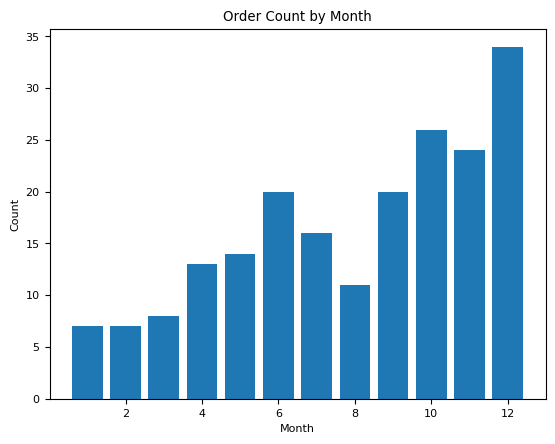

In [125]:
# Task 2 Descriptive statistics
#1
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('Major Assignment Superstore Data.xlsx', "Task 1 (Random Sample)")
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df_grouped = df.groupby('Month').size().reset_index(name='Count')
plt.bar(df_grouped['Month'], df_grouped['Count'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Order Count by Month')
plt.show()


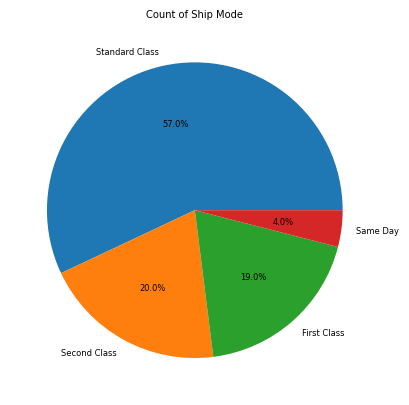

In [54]:
#2
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('Major Assignment Superstore Data.xlsx', "Task 1 (Random Sample)")
ship_mode_counts = df['Ship Mode'].value_counts()
plt.pie(ship_mode_counts, labels=ship_mode_counts.index, autopct='%1.1f%%')
plt.title('Count of Ship Mode')
plt.show()


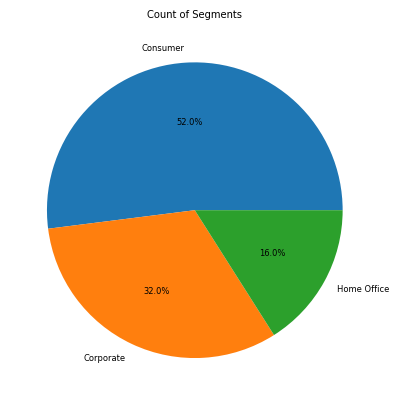

In [55]:
#3
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('Major Assignment Superstore Data.xlsx', "Task 1 (Random Sample)")
segment_counts = df['Segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Count of Segments')
plt.show()



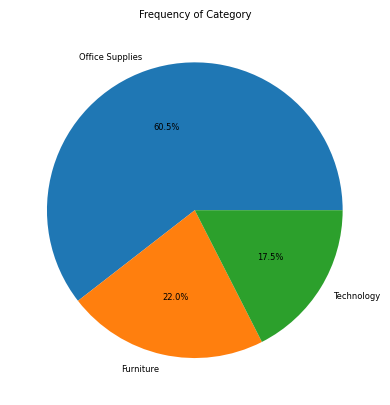

In [56]:
#4
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('Major Assignment Superstore Data.xlsx', "Task 1 (Random Sample)")
x_counts = df['Category'].value_counts()
plt.pie(x_counts, labels=x_counts.index, autopct='%1.1f%%')
plt.title('Frequency of Category')
plt.show()




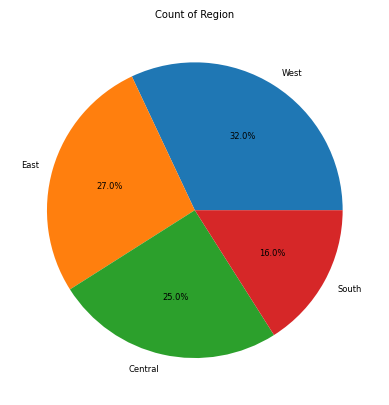

In [57]:
#5
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('Major Assignment Superstore Data.xlsx', "Task 1 (Random Sample)")
x_counts = df['Region'].value_counts()
plt.pie(x_counts, labels=x_counts.index, autopct='%1.1f%%')
plt.title('Count of Region')
plt.show()



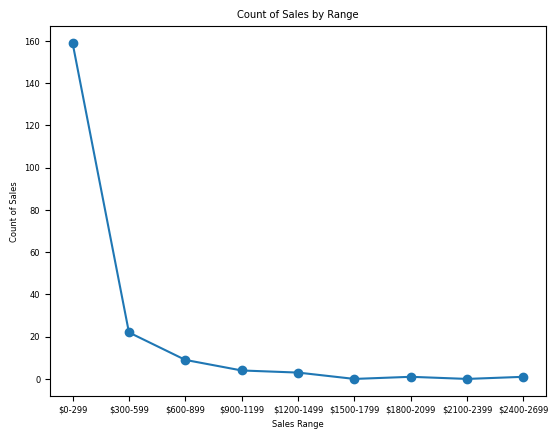

In [58]:
#6
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', "Task 1 (Random Sample)")

bins = range(0, 2999, 300)
labels = [f'${i}-{i+299}' for i in bins[:-1]]
df['Sales Range'] = pd.cut(df['Sales'], bins=bins, labels=labels)

sales_count = df.groupby('Sales Range')['Sales Range'].count()

sales_count.index = sales_count.index.astype(str)

plt.rcParams.update({'font.size': 6})
plt.plot(sales_count.index, sales_count.values, marker='o')
plt.xlabel('Sales Range')
plt.ylabel('Count of Sales')
plt.title('Count of Sales by Range')
plt.show()


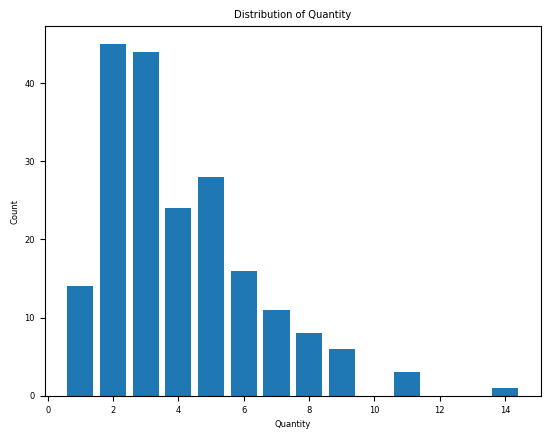

In [59]:
#7
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', "Task 1 (Random Sample)")

quantity_count = df['Quantity'].value_counts().sort_index()
plt.bar(quantity_count.index, quantity_count.values)

plt.xlabel('Quantity')
plt.ylabel('Count')
plt.title('Distribution of Quantity')

plt.show()


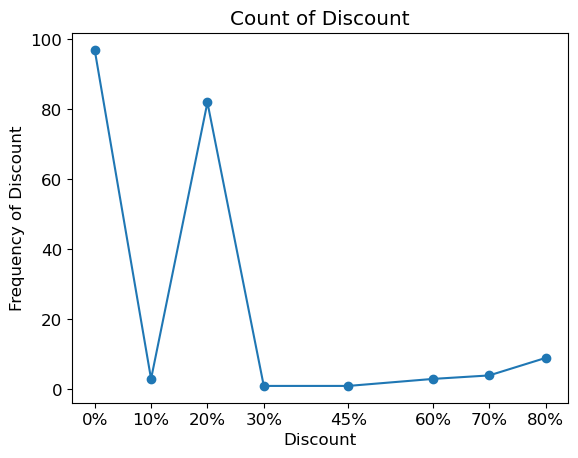

In [126]:
#8
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', "Task 1 (Random Sample)")

discount_count = df.groupby('Discount')['Discount'].count()

plt.rcParams.update({'font.size': 12})
plt.plot(discount_count.index, discount_count.values, marker='o')
plt.xlabel('Discount')
plt.ylabel('Frequency of Discount')
plt.title('Count of Discount')

plt.xticks(discount_count.index, [f"{int(d*100)}%" for d in discount_count.index])

plt.show()



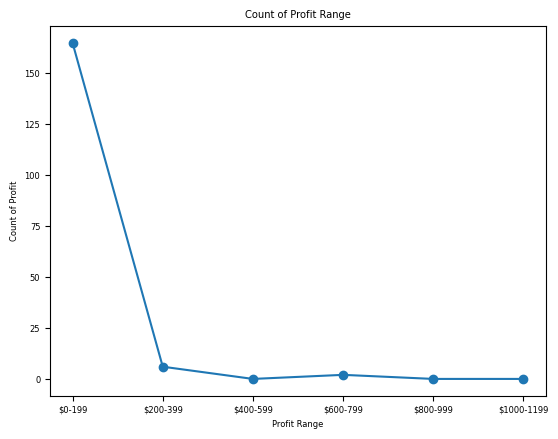

In [61]:
#9
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', "Task 1 (Random Sample)")

bins = range(0, 1400, 200)
labels = [f'${i}-{i+199}' for i in bins[:-1]]
df['Profit Range'] = pd.cut(df['Profit'], bins=bins, labels=labels)

sales_count = df.groupby('Profit Range')['Profit Range'].count()

sales_count.index = sales_count.index.astype(str)

plt.rcParams.update({'font.size': 6})
plt.plot(sales_count.index, sales_count.values, marker='o')
plt.xlabel('Profit Range')
plt.ylabel('Count of Profit')
plt.title('Count of Profit Range')
plt.show()

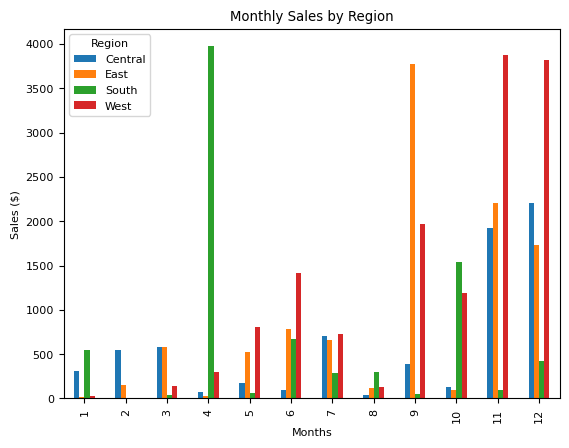

In [88]:
# Task 3 Dashboard
#1

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', "Task 1 (Random Sample)")

df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Month'] = df['Order Date'].dt.month

sales_by_month_and_region = df.groupby(['Month', 'Region'])['Sales'].sum()

sales_by_month_and_region = sales_by_month_and_region.reset_index().pivot(index='Month', columns='Region', values='Sales')

sales_by_month_and_region.plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('Sales ($)')
plt.title('Monthly Sales by Region')
plt.legend(title='Region', loc='upper left')
plt.show()


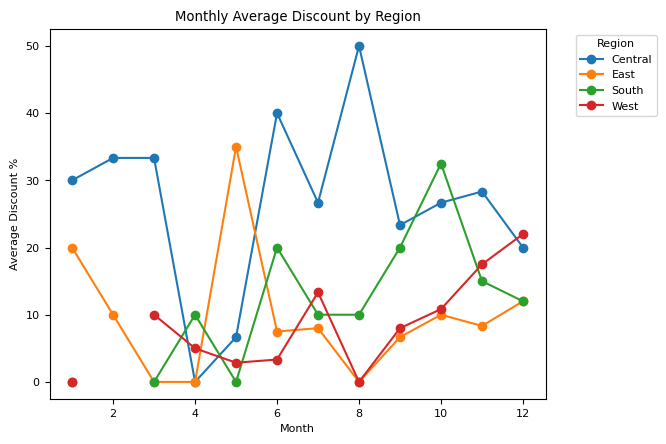

In [124]:
#2

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df['Discount'] = df['Discount'].fillna(0) * 100

monthly_avg_discount = df.groupby(['Month', 'Region'])['Discount'].mean().unstack()

monthly_avg_discount = monthly_avg_discount.reindex(range(1, 13))

plt.rcParams.update({'font.size': 8})
monthly_avg_discount.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Discount %')
plt.title('Monthly Average Discount by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


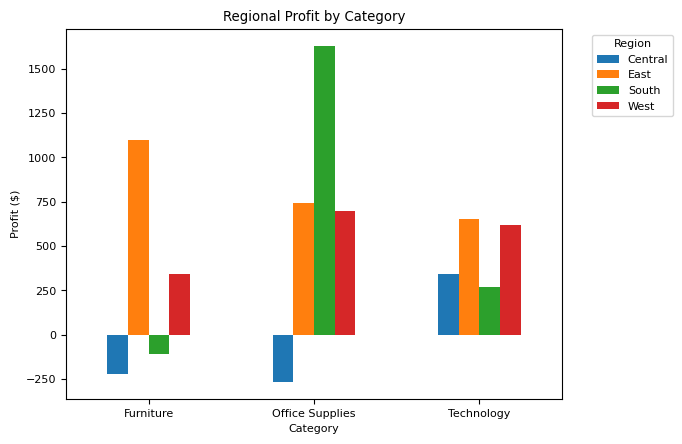

In [123]:
#3
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')
category_profit_region = df.pivot_table(values='Profit', index='Category', columns='Region', aggfunc='sum')
category_profit_region.plot(kind='bar', rot=0)
plt.xlabel('Category')
plt.ylabel('Profit ($)')
plt.title('Regional Profit by Category')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


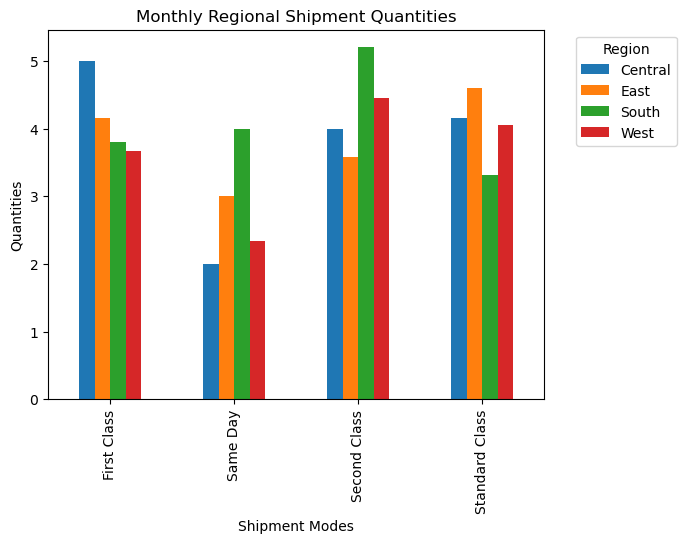

In [89]:
#4
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')

monthly_shipment_quantities = df.groupby(['Ship Mode', 'Region'])['Quantity'].mean().unstack()

plt.rcParams.update({'font.size': 10})
monthly_shipment_quantities.plot(kind='bar')
plt.xlabel('Shipment Modes')
plt.ylabel('Quantities')
plt.title('Regional Shipment Quantities')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


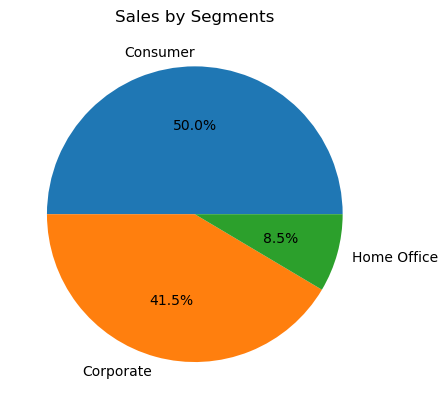

In [90]:
#5
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')

segment_sales = df.groupby('Segment')['Sales'].sum()

plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%')
plt.title('Sales by Segments')
plt.show()


In [117]:
# Descriptive Statistic Analysises
import pandas as pd 
import numpy as np

df = pd.read_excel('Major Assignment Superstore Data.xlsx','Task 1 (Random Sample)')

print("Summary statistic:", df['Sales'].describe().round(2))

print("Summary statistic:", df['Profit'].describe().round(2))

print("Summary statistic (%):")
print(df['Discount'].apply(lambda x: x*100).describe(percentiles=[.25, .5, .75, .90, .95]).round(1))


print("Summary statistic:", df['Quantity'].describe().round(1))

Summary statistic: count     200.00
mean      201.10
std       389.99
min         0.84
25%        19.08
50%        46.28
75%       239.95
max      2888.13
Name: Sales, dtype: float64
Summary statistic: count     200.00
mean       29.02
std       144.44
min      -694.29
25%         2.94
50%        10.44
75%        30.16
max      1264.76
Name: Profit, dtype: float64
Summary statistic (%):
count    200.0
mean      14.6
std       20.2
min        0.0
25%        0.0
50%       15.0
75%       20.0
90%       20.0
95%       70.0
max       80.0
Name: Discount, dtype: float64
Summary statistic: count    200.0
mean       4.0
std        2.3
min        1.0
25%        2.0
50%        3.0
75%        5.0
max       14.0
Name: Quantity, dtype: float64


In [127]:
# Task 4 Confidence intervals
import pandas as pd
import numpy as np
from scipy.stats import t

df = pd.read_excel('Major Assignment Superstore Data.xlsx', sheet_name='Task 1 (Random Sample)')

consumer_sales = df.loc[(df['Segment'] == 'Consumer'), 'Sales']
east_profit = df.loc[(df['Region'] == 'East'), 'Profit']

mean_sales = np.mean(consumer_sales)
mean_profit = np.mean(east_profit)

se_sales = np.std(consumer_sales, ddof=1) / np.sqrt(len(consumer_sales))
se_profit = np.std(east_profit, ddof=1) / np.sqrt(len(east_profit))

df_sales = len(consumer_sales) - 1
df_profit = len(east_profit) - 1
conf_level = 0.95

t_sales = t.ppf(conf_level, df_sales)
t_profit = t.ppf(conf_level, df_profit)

ci_sales = (mean_sales - t_sales * se_sales, mean_sales + t_sales * se_sales)
ci_profit = (mean_profit - t_profit * se_profit, mean_profit + t_profit * se_profit)

print("95% confidence interval for Average Sales for the Consumer sector: ", ci_sales)
print("95% confidence interval for Average Profit for sales from the East: ", ci_profit)


95% confidence interval for Average Sales for the Consumer sector:  (133.3154483947102, 253.42642660528975)
95% confidence interval for Average Profit for sales from the East:  (21.60768214102438, 70.90749563675341)
